## Exploring Stackoverflow Anual Survey 2017¶
The goal of this project is to apply the "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process which are:
* Business Understanding.
* Data Understanding.
* Prepare Data.
* Evaluate the results.
* Deploy

### Business Understanding
I'm intrested to know the answers for three main questions which are:
* Is there an equality of salary and working hours across males and females?
* Which programming language has the highest job satisfaction?
* Where is the most countries that developers working from home?
This different quesitons will allow me to deal with more than two different columns and understand the data in a better way.

### Data Understanding
This is the first step in our process, it will allow us to understand the data and it's types and the necessary statistics.

In [179]:
#import the needed libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [180]:
#reading the data
df=pd.read_csv("Data/survey_results_public.csv")
df_info=pd.read_csv("Data/survey_results_schema.csv")
df.head(10)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [181]:
df_info.head(20)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [182]:
#Write a function that show rows and columns for dataframe
def find_DataVolume(dataframe):
    '''Input: data frame
       Output: print the dataframe rows and columns'''
    print('This dataframe has',dataframe.shape[0],'rows and',dataframe.shape[1],'columns')

In [130]:
#Finding the number of rows and columns for each dataframe:
find_DataVolume(df)
find_DataVolume(df_info)

This dataframe has 51392 rows and 154 columns
This dataframe has 154 rows and 2 columns


In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
df_info.describe()

,Column,Question
count,154,154
unique,154,149
top,HighestEducationParents,Which of the following database technologies h...
freq,1,2


In [133]:
#Knowing missing value in public dataframe
missing_value=df.isnull().sum()
missing_value

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

We can see that there are a huge diffirence in data columns that some of them has no missing values and some  more than half holds null values 

In [139]:
#How many categorical data are there
df_cat=df.select_dtypes('object')

print('There are',df_cat.shape[1],'categorical columns out of 154 columns')

There are 147 categorical columns out of 154 columns


In [140]:
#See the columns of df 
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [141]:
#Check want to look for columns which columns has no missing values
no_nulls=set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'EmploymentStatus', 'FormalEducation', 'ProgramHobby', 'Professional', 'University', 'Respondent', 'Country'}


In [142]:
#Find which columns have missing values with mroe than 50 percent
cols_withNulls=set(df.columns[df.isnull().mean()>0.75])
print(cols_withNulls)

{'YearsCodedJobPast', 'MobileDeveloperType', 'ExCoderSkills', 'ExCoderBelonged', 'ExCoderActive', 'ExCoderWillNotCode', 'ExpectedSalary', 'TimeAfterBootcamp', 'ExCoderReturn', 'NonDeveloperType', 'ExCoderNotForMe', 'ExCoder10Years', 'WebDeveloperType', 'ExCoderBalance'}


Schema dataframe holds the description of some columns of public dataframe 

In [143]:
#In order to understand the data better, writing a function that get the describtion of each column from schema data set
def get_description(column_name, schema):
    '''
    Input: column name,string, name of column we will get the description of
           schema: pandas dataframe of the survey
    Output: description of the column
    '''
    desc=list(schema[schema['Column']==column_name]['Question'])[0]
    return desc

In [145]:
#get the description of MajorUndergrad column
get_description('MajorUndergrad',df_info)


"Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"

### Prepare data for question1: Is there an equality  of salary and working hours across males and females?

In [146]:
#Split the data into two groups, males and females 
splitted_gender=df.groupby(df.Gender)
df_male=splitted_gender.get_group('Male')
df_female=splitted_gender.get_group("Female")
print('The total number of respondents is',df.shape[0],'and there was',df.Gender.isnull().sum(),
      'have null values','Males were',df_male.shape[0],'and females were',df_female.shape[0],'and the rest are others')


The total number of respondents is 51392 and there was 16345 have null values Males were 31589 and females were 2600 and the rest are others


In [155]:
df_female.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,2600.000000,2237.000000,2130.000000,1183.000000,2562.000000,819.000000,159.000000
mean,26901.968462,7.185069,6.936620,4.191885,8.332943,58083.924534,29830.759637
std,14535.145431,1.924722,2.182432,7.343370,1.425352,38607.488222,29389.372370
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044046
25%,14857.750000,6.000000,6.000000,1.000000,8.000000,31250.000000,1956.196728
50%,26245.500000,7.000000,7.000000,2.000000,8.000000,52500.000000,22500.000000
75%,40975.000000,8.000000,8.000000,4.000000,9.000000,83000.000000,45845.552297
max,51386.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,150000.000000


In [159]:
#Define a function for plotting column from a dataframe
def plot_value_counts(df, col):
    '''
    INPUT:
        - df : dataframe 
        - col - string : the name of the column
    OUTPUT:
        - vc - number : the count of each attribute in chosen column
    '''
    value_count = df[col].value_counts()
    print(value_count[:10]/df.shape[0])
    (value_count[:10]/df.shape[0]).plot(kind='barh')
    plt.title(col)
    plt.grid(axis='x',linestyle='--')
    plt.xlabel('Ratio')

Male                                  0.614668
Female                                0.050592
Other                                 0.004378
Male; Other                           0.003327
Gender non-conforming                 0.003113
Male; Gender non-conforming           0.001265
Female; Transgender                   0.001090
Transgender                           0.001070
Female; Gender non-conforming         0.000564
Transgender; Gender non-conforming    0.000292
Name: Gender, dtype: float64


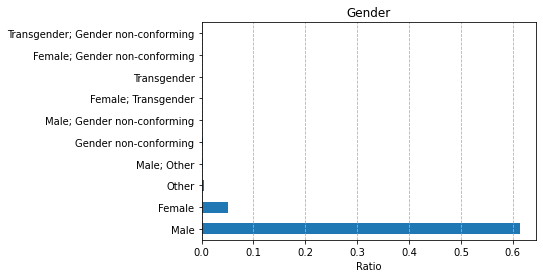

In [160]:
#Plot public data based on gender
plot_value_counts(df,'Gender')

If we compare between males and females we can see that the average salary for males is almost 57K$, and for females is 58K$ per year which are almost equal from hours/week side 

### Prepare data for question2: Which programming language has the highest job satisfaction?

In [161]:
#Have a look about each choice counter
df.HaveWorkedLanguage.value_counts()


C#; JavaScript; SQL                                                                                           1276
JavaScript; PHP; SQL                                                                                          1143
Java                                                                                                           913
JavaScript                                                                                                     807
JavaScript; PHP                                                                                                662
                                                                                                              ... 
Java; JavaScript; Objective-C; PHP; SQL; Swift; TypeScript                                                       1
C; C++; Java; Python; Smalltalk                                                                                  1
C#; JavaScript; Lua; Python; TypeScript                                         

In [162]:
#Missing values
missing_languages=sum(df.HaveWorkedLanguage.isnull())
print('There is',missing_languages,'missing languages and',np.sum(df.HaveWorkedLanguage.count()),'with values')


There is 14767 missing languages and 36625 with values


In [163]:
#split the languages in HaveWorkedLanguage column
#We split them in order to make dealing with them easier
splited_lang=df.HaveWorkedLanguage.str.split(';')
#Filling the missing values
splited_lang=splited_lang.fillna('N')
#Combining them all together to count each one alone
#Initilize list for combining
#splited_lang
lang_list=[]
for val in splited_lang:
    for n in val:
        lang_list.append(n)
lang_list

['Swift',
 'JavaScript',
 ' Python',
 ' Ruby',
 ' SQL',
 'Java',
 ' PHP',
 ' Python',
 'Matlab',
 ' Python',
 ' R',
 ' SQL',
 'N',
 'JavaScript',
 ' PHP',
 ' Rust',
 'Matlab',
 ' Python',
 'CoffeeScript',
 ' Clojure',
 ' Elixir',
 ' Erlang',
 ' Haskell',
 ' JavaScript',
 ' Python',
 ' Ruby',
 'C#',
 ' JavaScript',
 'Objective-C',
 ' Swift',
 'R',
 ' SQL',
 'N',
 'C',
 ' C++',
 ' Java',
 'Java',
 ' JavaScript',
 ' Ruby',
 ' SQL',
 'Assembly',
 ' C',
 ' C++',
 'JavaScript',
 ' VB.NET',
 'JavaScript',
 'C',
 ' Clojure',
 ' JavaScript',
 ' Matlab',
 ' Rust',
 ' SQL',
 ' Swift',
 'N',
 'Perl',
 ' Python',
 'N',
 'C#',
 ' JavaScript',
 ' SQL',
 'Java',
 'PHP',
 ' SQL',
 'N',
 'Java',
 ' Scala',
 'Java',
 ' JavaScript',
 ' Objective-C',
 ' Python',
 ' Swift',
 'N',
 'JavaScript',
 ' Python',
 'N',
 'N',
 'N',
 'C#',
 ' Java',
 'JavaScript',
 'Assembly',
 ' C',
 'C#',
 ' JavaScript',
 ' Matlab',
 ' Python',
 ' R',
 'C#',
 ' F#',
 ' JavaScript',
 ' SQL',
 'C#',
 ' Java',
 ' JavaScript',
 'C#',


In [164]:
# After we converted them in an array, we will calculate their occurrences
#Define a function to group each language alone and get them as dict
def group_list(data_list):
    ''' Input: Group by count to a list,
        Output: returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict



In [165]:
lang_list=group_list(lang_list)
lang_list

[{'Programming Language': 'Swift', 'Count': 72},
 {'Programming Language': 'JavaScript', 'Count': 5716},
 {'Programming Language': ' Python', 'Count': 10719},
 {'Programming Language': ' Ruby', 'Count': 3174},
 {'Programming Language': ' SQL', 'Count': 18466},
 {'Programming Language': 'Java', 'Count': 5902},
 {'Programming Language': ' PHP', 'Count': 9765},
 {'Programming Language': 'Matlab', 'Count': 133},
 {'Programming Language': ' R', 'Count': 1482},
 {'Programming Language': 'N', 'Count': 14767},
 {'Programming Language': ' Rust', 'Count': 412},
 {'Programming Language': 'CoffeeScript', 'Count': 698},
 {'Programming Language': ' Clojure', 'Count': 214},
 {'Programming Language': ' Elixir', 'Count': 223},
 {'Programming Language': ' Erlang', 'Count': 232},
 {'Programming Language': ' Haskell', 'Count': 536},
 {'Programming Language': ' JavaScript', 'Count': 17159},
 {'Programming Language': 'C#', 'Count': 8596},
 {'Programming Language': 'Objective-C', 'Count': 305},
 {'Programmin

In [166]:
#There are 14767 missing values
#Building dataframe for the dictionary to easly analyz it
df_lang = pd.DataFrame.from_dict(lang_list)
#Drop the missing values with No language field
df_lang=df_lang.drop(labels=9, axis=0)
#sorting them
df_lang=df_lang.sort_values(['Count'], ascending= False)
df_lang

,Programming Language,Count
4,SQL,18466
16,JavaScript,17159
2,Python,10719
6,PHP,9765
23,Java,8622
...,...,...
67,F#,24
65,Hack,22
69,TypeScript,9
68,Visual Basic 6,8


The highest programming languages are SQL,Javascript,Python and the lowest are Rust,Visual Basic and TypeScrpit


<AxesSubplot:xlabel='Programming Language'>

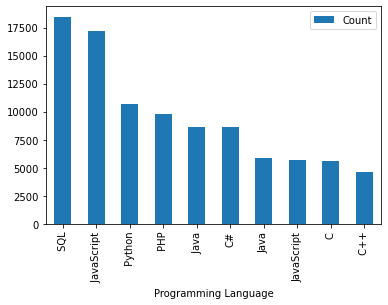

In [169]:
#Plotting our results
top10_lang=df_lang.head(10)
top10_lang.plot.bar(x='Programming Language', y='Count', style='o')



In [170]:
#Finding the lowest ten and plotting them
Lowest10_kang=df_lang.nsmallest(10,'Count')
Lowest10_kang


,Programming Language,Count
57,Rust,4
68,Visual Basic 6,8
69,TypeScript,9
65,Hack,22
67,F#,24
61,Julia,28
64,VBA,28
47,VB.NET,33
62,Dart,37
60,Lua,38


<AxesSubplot:xlabel='Programming Language'>

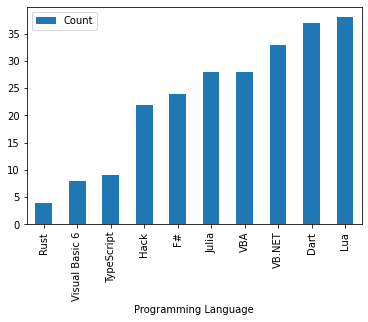

In [59]:
Lowest10_kang.plot.bar(x='Programming Language', y='Count', style='o')
#Here we analyzed the languages and found the top languages and lowest also.

### Preparing the data for Question3:  Where are the most countries that developers working from home?